In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Data Reading

In [20]:
Calibrated_Background_CPM = pd.read_csv('Final Project Data - Calibrated Background (Scale of 0.1).csv')
Calibrated_Sample_CPM = pd.read_csv('Final Project Data - Calibrated_Rad_Source_45cm (Scale of 0.1).csv')
Test_Background_CPM = pd.read_csv('Test_Background_2.csv',usecols=['Time','counts'])
Test_Sample_45cm_CPM = pd.read_csv('Test_Sample_45cm_1.csv',usecols=['Time','counts'])
Etch_Lab_Banana = pd.read_csv('Etch_Lab_Banana.csv',usecols=['Time','counts'],skiprows=range(16,1349))
Etch_Lab_Background = pd.read_csv('Etch_Lab_Background.csv',usecols=['Time','counts'])

# Plotting Background

Text(0.5, 1.0, 'Background Radiation')

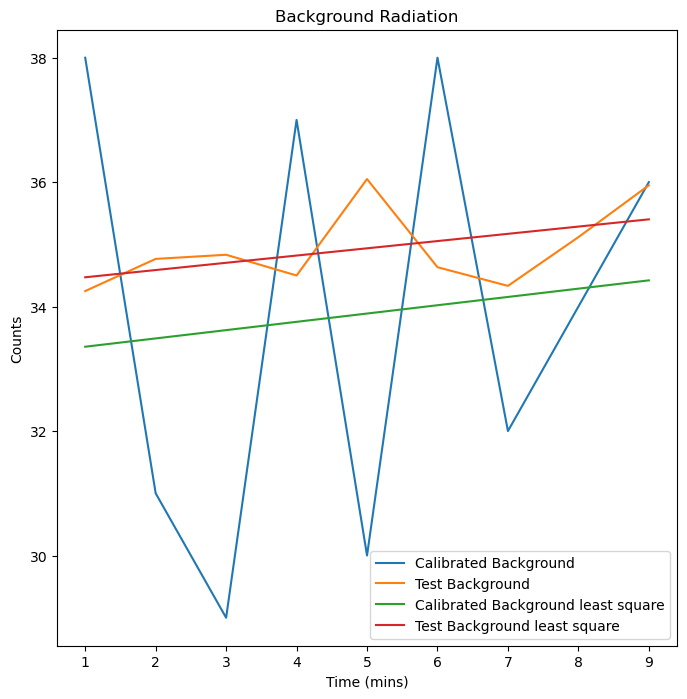

In [21]:
fig1=plt.figure(figsize=(8,8))
ax1=plt.axes()
ax1.plot(Calibrated_Background_CPM['1 min Interval'][:9],Calibrated_Background_CPM['Counts'][:9],label='Calibrated Background')
ax1.plot(range(1,10),Test_Background_CPM['counts'][1:],label='Test Background')
ax1.plot(range(1,10),0.1333*(np.array(range(1,10)))+33.22222222,label='Calibrated Background least square')
ax1.plot(range(1,10),0.11638889*(np.array(range(1,10)))+34.35509259,label='Test Background least square')
ax1.legend()
ax1.set_xlabel('Time (mins)')
ax1.set_ylabel('Counts')
plt.title('Background Radiation')

In [22]:
np.polyfit(range(1,10),Calibrated_Background_CPM['Counts'][:9],1)

array([ 0.13333333, 33.22222222])

In [23]:
np.polyfit(range(1,10),Test_Background_CPM['counts'][1:],1)

array([ 0.11638889, 34.35509259])

# Background Hist

Text(0, 0.5, 'Frequency')

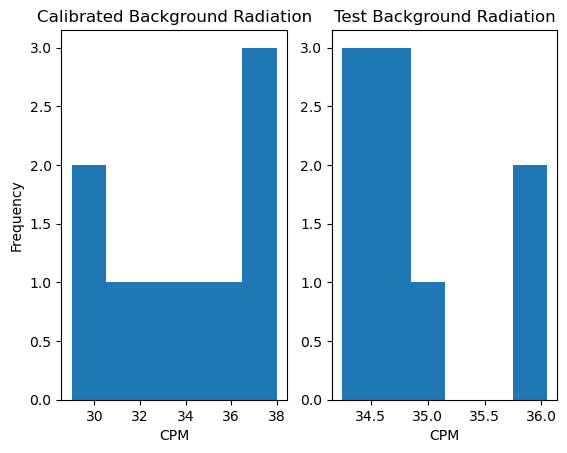

In [24]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(Calibrated_Background_CPM['Counts'][:9],bins=6)
ax2.hist(Test_Background_CPM['counts'][1:],bins=6)
ax1.set_title('Calibrated Background Radiation')
ax2.set_title('Test Background Radiation')
ax1.set_xlabel('CPM')
ax2.set_xlabel('CPM')
ax1.set_ylabel('Frequency')

# Plotting Sample

Text(0.5, 1.0, 'Sample 45 cm away')

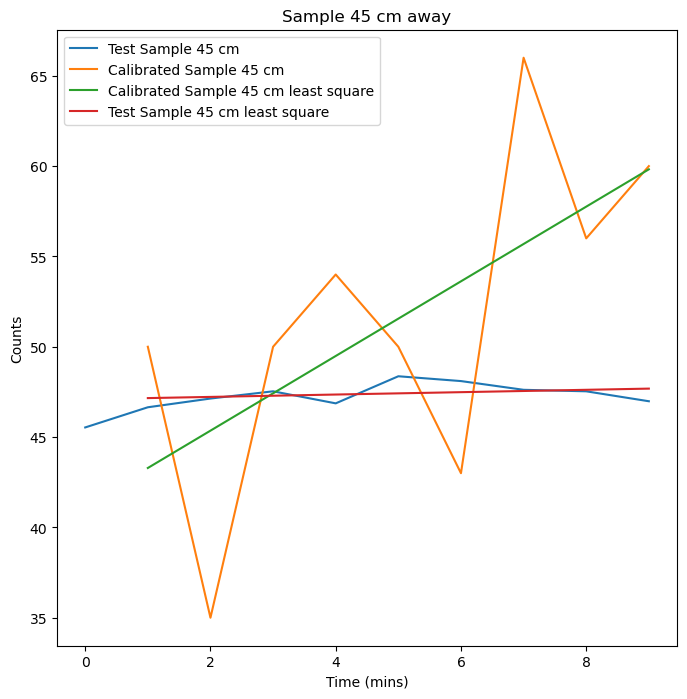

In [25]:
fig2=plt.figure(figsize=(8,8))
ax2=plt.axes()
ax2.plot(range(0,10),Test_Sample_45cm_CPM['counts'],label='Test Sample 45 cm')
ax2.plot(Calibrated_Sample_CPM['1 min Interval'][:9],Calibrated_Sample_CPM['Counts'][:9],label='Calibrated Sample 45 cm')
ax2.plot(range(1,10),2.06666667*(np.array(range(1,10)))+41.22222222,label='Calibrated Sample 45 cm least square')
ax2.plot(range(1,10),0.06555556*(np.array(range(1,10)))+47.09259259,label='Test Sample 45 cm least square')
ax2.legend()
ax2.set_xlabel('Time (mins)')
ax2.set_ylabel('Counts')
plt.title('Sample 45 cm away')

In [26]:
np.polyfit(range(1,10),Calibrated_Sample_CPM['Counts'][:9],1)

array([ 2.06666667, 41.22222222])

In [27]:
np.polyfit(range(1,10),Test_Sample_45cm_CPM['counts'][1:],1)

array([ 0.06555556, 47.09259259])

# Sample Hist

Text(0, 0.5, 'Frequency')

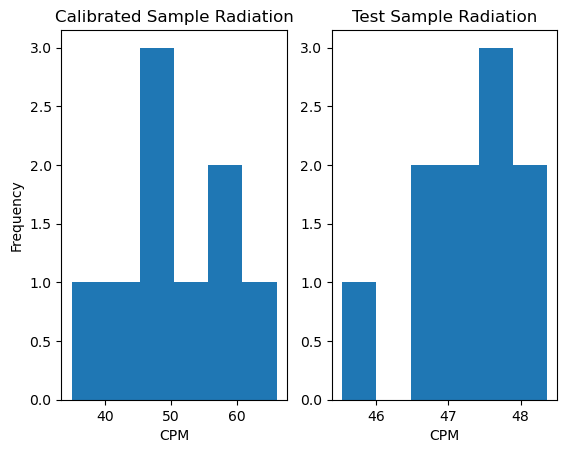

In [28]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(Calibrated_Sample_CPM['Counts'][:9],bins=6)
ax2.hist(Test_Sample_45cm_CPM['counts'],bins=6)
ax1.set_title('Calibrated Sample Radiation')
ax2.set_title('Test Sample Radiation')
ax1.set_xlabel('CPM')
ax2.set_xlabel('CPM')
ax1.set_ylabel('Frequency')

# Background Analysis

In [29]:
mean_Calibrated_Background = np.mean(Calibrated_Background_CPM['Counts'][:9])
mean_Test_Background = np.mean(Test_Background_CPM['counts'][1:])
print(f'Mean Calibrated: {mean_Calibrated_Background}')
print(f'Mean Test: {mean_Test_Background}')

std_Calibrated_Background = np.std(Calibrated_Background_CPM['Counts'][:9])
std_Test_Background = np.std(Test_Background_CPM['counts'][1:])
print(f'Std Calibrated: {std_Calibrated_Background}')
print(f'Std Test: {std_Test_Background}')

uncertainty_Calibrated_Background = std_Calibrated_Background/np.sqrt(9)
uncertainty_Test_Background = std_Test_Background/np.sqrt(9)
print(f'Uncertainty Calibrated: {uncertainty_Calibrated_Background}')
print(f'Uncertainty Test: {uncertainty_Test_Background}')

Mean Calibrated: 33.888888888888886
Mean Test: 34.93703703703704
Std Calibrated: 3.3147630867058435
Std Test: 0.6197260335446212
Uncertainty Calibrated: 1.1049210289019478
Uncertainty Test: 0.20657534451487372


# Sample Analysis

In [30]:
mean_Calibrated_Sample = np.mean(Calibrated_Sample_CPM['Counts'][:9])
mean_Test_Sample = np.mean(Test_Sample_45cm_CPM['counts'])
print(f'Mean Calibrated: {mean_Calibrated_Sample}')
print(f'Mean Test: {mean_Test_Sample}')

std_Calibrated_Sample = np.std(Calibrated_Sample_CPM['Counts'][:9])
std_Test_Sample = np.std(Test_Sample_45cm_CPM['counts'])
print(f'Std Calibrated: {std_Calibrated_Sample}')
print(f'Std Test: {std_Test_Sample}')

uncertainty_Calibrated_Sample = std_Calibrated_Sample/np.sqrt(9)
uncertainty_Test_Sample = std_Test_Sample/np.sqrt(9)
print(f'Uncertainty Calibrated: {uncertainty_Calibrated_Sample}')
print(f'Uncertainty Test: {uncertainty_Test_Sample}')

Mean Calibrated: 51.55555555555556
Mean Test: 47.23166666666666
Std Calibrated: 8.56492992915634
Std Test: 0.761557249617155
Uncertainty Calibrated: 2.8549766430521135
Uncertainty Test: 0.25385241653905166


# Bannana Data

Text(0, 0.5, 'Counts Per Minute (CPS)')

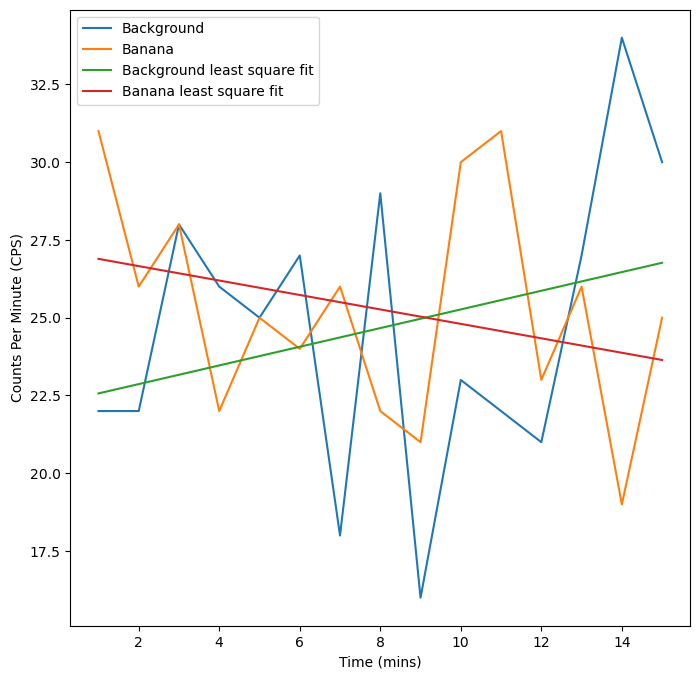

In [31]:
plt.figure(figsize=(8,8))
plt.plot(range(1,16), np.array(Etch_Lab_Background['counts'])*60,label='Background')
plt.plot(range(1,16), np.array(Etch_Lab_Banana['counts'])*60,label='Banana')
plt.plot(range(1,16), np.arange(1,16)*np.polyfit(range(1,16),np.array(Etch_Lab_Background['counts'])*60,deg=1)[0]+np.polyfit(range(1,16),np.array(Etch_Lab_Background['counts'])*60,deg=1)[1],label='Background least square fit')
plt.plot(range(1,16), np.arange(1,16)*np.polyfit(range(1,16),np.array(Etch_Lab_Banana['counts'])*60,deg=1)[0]+np.polyfit(range(1,16),np.array(Etch_Lab_Banana['counts'])*60,deg=1)[1],label='Banana least square fit')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Counts Per Minute (CPS)')

# Banana Hist

Text(0, 0.5, 'Frequency')

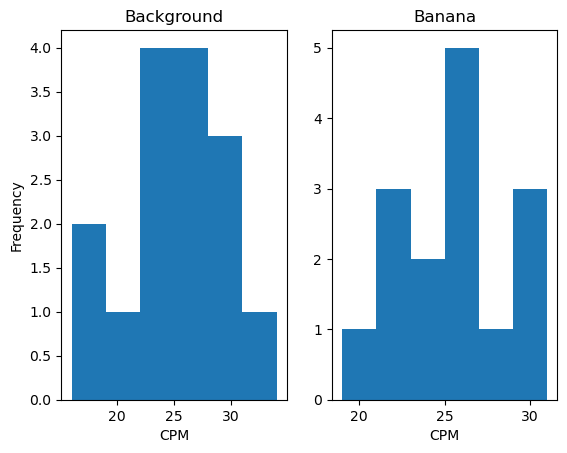

In [32]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(np.array(Etch_Lab_Background['counts'])*60,bins=6)
ax2.hist(np.array(Etch_Lab_Banana['counts'])*60,bins=6)
ax1.set_title('Background')
ax2.set_title('Banana')
ax1.set_xlabel('CPM')
ax2.set_xlabel('CPM')
ax1.set_ylabel('Frequency')

# Banana Analysis

In [33]:
mean_Etch_Background = np.mean(np.array(Etch_Lab_Background['counts'])*60)
mean_Etch_Banana = np.mean(np.array(Etch_Lab_Banana['counts'])*60)
print(f'Mean Background: {mean_Etch_Background}')
print(f'Mean Banana: {mean_Etch_Banana}')

std_Etch_Background = np.std(np.array(Etch_Lab_Background['counts'])*60)
std_Etch_Banana = np.std(np.array(Etch_Lab_Banana['counts'])*60)
print(f'Std Background: {std_Etch_Background}')
print(f'Std Banana: {std_Etch_Banana}')

uncertainty_Etch_Background = std_Etch_Background/np.sqrt(15)
uncertainty_Etch_Banana = std_Etch_Banana/np.sqrt(15)
print(f'Uncertainty Background: {uncertainty_Etch_Background}')
print(f'Uncertainty Banana: {uncertainty_Etch_Banana}')

Mean Background: 24.666666666666668
Mean Banana: 25.266666666666666
Std Background: 4.584999697079841
Std Banana: 3.4922135609890135
Uncertainty Background: 1.1838418312770849
Uncertainty Banana: 0.9016856642073432


# Overall Analysis

In [34]:
print(f'The difference between the mean Calibrated Background radiation in Jacobs 10 and the mean Tested Background radiation in Jacobs 10 is {(mean_Test_Background-mean_Calibrated_Background)/std_Calibrated_Background} standard (Calibrated) deviations or {(mean_Test_Background-mean_Calibrated_Background)/std_Test_Background} standard (Tested) deviations')
print(f'The difference between the mean Calibrated Sample radiation in Jacobs 10 and the mean Tested Sample radiation in Jacobs 10 is {(mean_Calibrated_Sample-mean_Test_Sample)/std_Calibrated_Sample} standard (Calibrated) deviations or {(mean_Calibrated_Sample-mean_Test_Sample)/std_Test_Sample} standard (Tested) deviations')
print(f'The difference between the mean Tested Background radiation in Etchevery and the mean Tested Background radiation in Jacobs 10 is {(mean_Test_Background-mean_Etch_Background)/std_Test_Background} standard (Jacobs 10) deviations or {(mean_Test_Background-mean_Etch_Background)/std_Etch_Background} standard (Etchevery) deviations')
print(f'The difference between the mean Tested Banana radiation in Etchevery and the mean Tested Background radiation in Etchevery is {(mean_Etch_Banana-mean_Etch_Background)/std_Etch_Background} standard (Background) deviations or {(mean_Etch_Banana-mean_Etch_Background)/std_Etch_Banana} standard (Banana) deviations')

The difference between the mean Calibrated Background radiation in Jacobs 10 and the mean Tested Background radiation in Jacobs 10 is 0.31620605175429994 standard (Calibrated) deviations or 1.6913088871756792 standard (Tested) deviations
The difference between the mean Calibrated Sample radiation in Jacobs 10 and the mean Tested Sample radiation in Jacobs 10 is 0.5048364580508372 standard (Calibrated) deviations or 5.677693818898805 standard (Tested) deviations
The difference between the mean Tested Background radiation in Etchevery and the mean Tested Background radiation in Jacobs 10 is 16.572436551724895 standard (Jacobs 10) deviations or 2.239993685694572 standard (Etchevery) deviations
The difference between the mean Tested Banana radiation in Etchevery and the mean Tested Background radiation in Etchevery is 0.1308615135530182 standard (Background) deviations or 0.17181079837227214 standard (Banana) deviations


#### Comparing the Background data collected in lab, the Sample data collected in lab, and the Banana/Background data collected in Etchevery Hall it can be determined that the difference between the background radiation and sample radiation in lab is statistically significant, but the difference between the background and banana radiation in Etchevery Hall is not statistically significant.

#### A more in depth reading of the data shows that the difference between the background data collected from the Calibrated Geiger Counter and the Tested Geiger Counter is not statistically significant. This shows us that at least for background radiation levels both sensors are comparable, and specifically when looking at the graphs of both data sets there is only a difference of 1 cpm through the line of best fit using the least square error method.

#### The difference betweeen the sample data collected from the Calibrated Geiger Counter and the Tested Geiger Counter is statistically significant using the far more accurate standard deviations from the Tested Geiger Counter, which leads to the conclusion that the Calibrated Geiger Counter is either intriniscally not calibrated for higher radiation doses or such a vast discrepancy is born out of human error when counting.

#### 